# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
data = pd.read_csv("/Users/Shiva/Desktop/python/AllLabs/unsupervisedLab/Cancer.csv")
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
data.shape

(699, 11)

In [7]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [9]:
data.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [11]:
np.unique(data['Bare Nuclei'])

array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9', '?'],
      dtype=object)

In [12]:
temp = data[data['Bare Nuclei']=='?']
temp.count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [13]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [14]:
data['Bare Nuclei'].replace("?", 1, inplace=True)

In [15]:
data[data['Bare Nuclei']=='?'].sum()

ID                             0.0
ClumpThickness                 0.0
Cell Size                      0.0
Cell Shape                     0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Normal Nucleoli                0.0
Bland Chromatin                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

In [16]:
data['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [17]:
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           699 non-null    int64
 1   ClumpThickness               699 non-null    int64
 2   Cell Size                    699 non-null    int64
 3   Cell Shape                   699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Bland Chromatin              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


In [19]:
dup = data.duplicated()
dup.sum()

9

In [20]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           690 non-null    int64
 1   ClumpThickness               690 non-null    int64
 2   Cell Size                    690 non-null    int64
 3   Cell Shape                   690 non-null    int64
 4   Marginal Adhesion            690 non-null    int64
 5   Single Epithelial Cell Size  690 non-null    int64
 6   Bare Nuclei                  690 non-null    int64
 7   Normal Nucleoli              690 non-null    int64
 8   Bland Chromatin              690 non-null    int64
 9   Mitoses                      690 non-null    int64
 10  Class                        690 non-null    int64
dtypes: int64(11)
memory usage: 64.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [21]:
# Check for correlation of variables

In [22]:
data = data.drop(['ID'],axis =1)

In [23]:
data.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [24]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [25]:
#Let us check the pair plot

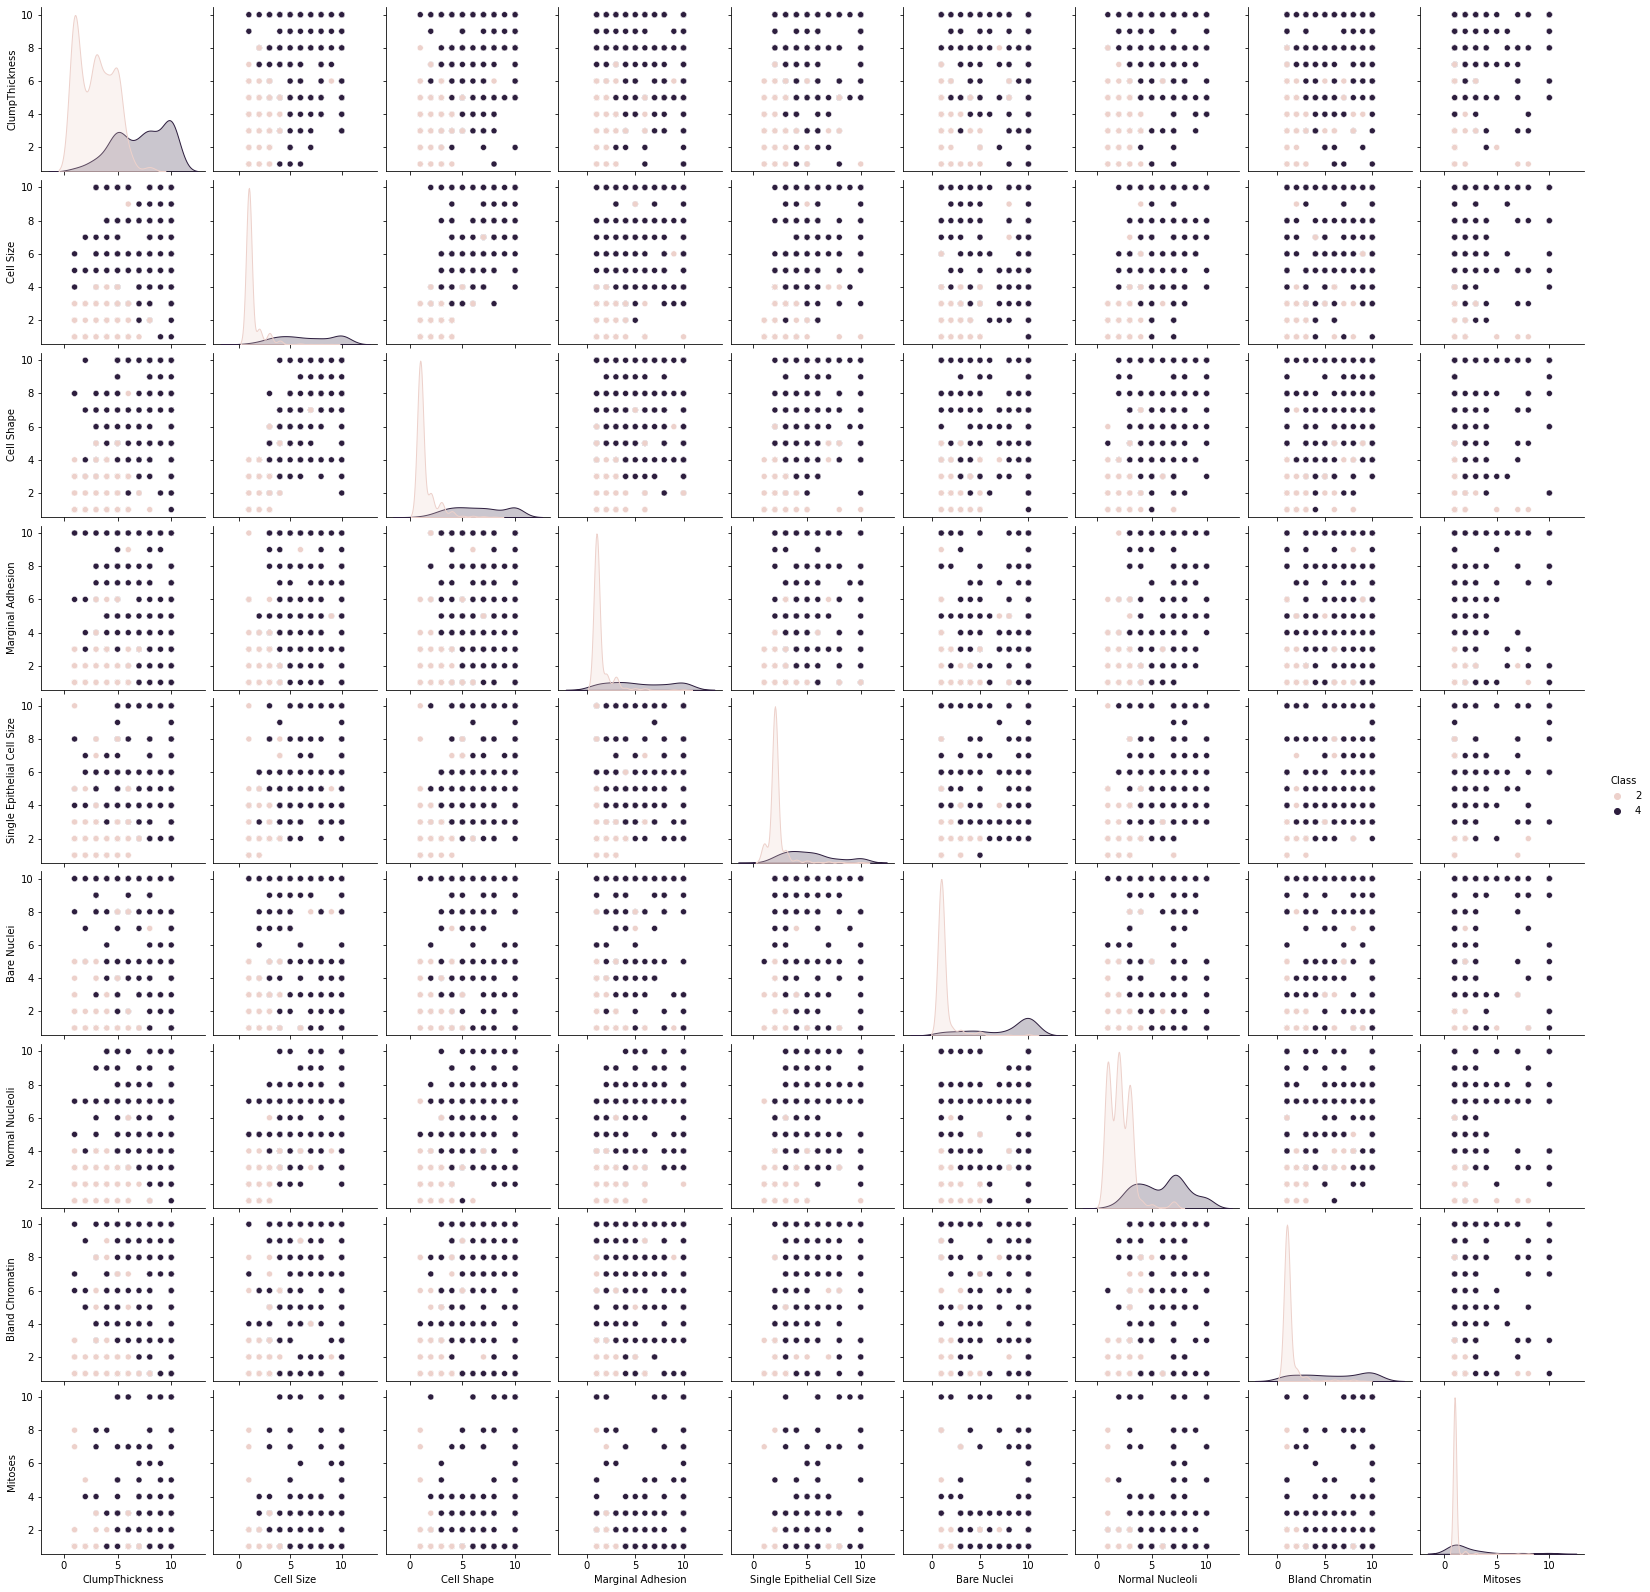

In [26]:
sns.pairplot(data, diag_kind='kde', hue = 'Class')

In [27]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [28]:
# We could see most of the outliers are now removed.

<AxesSubplot:>

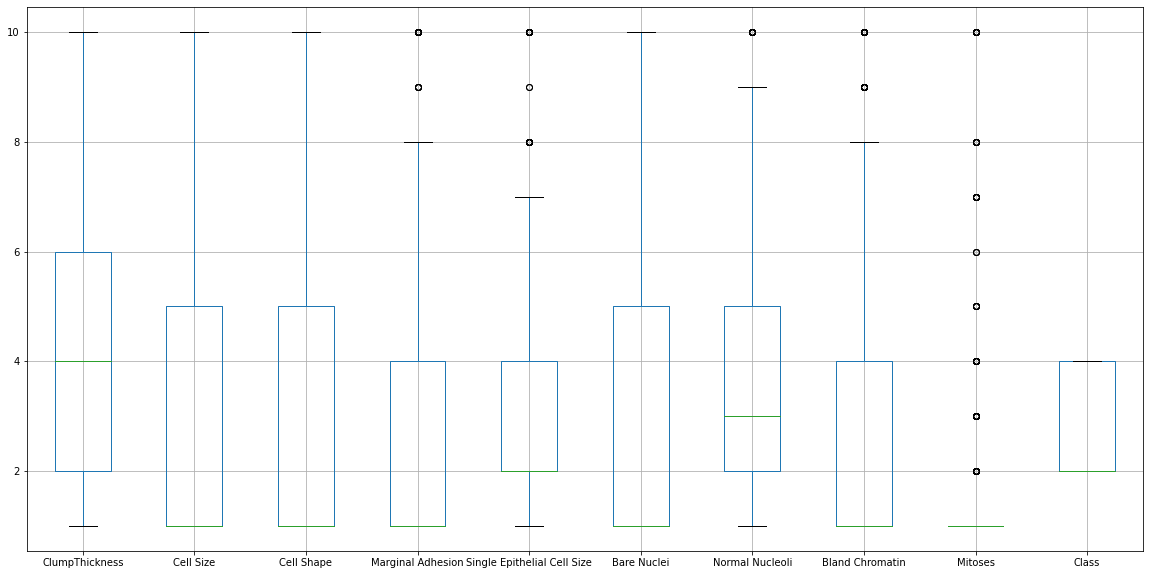

In [29]:
data.boxplot(figsize = (20,10))

In [30]:
pd.crosstab(data['Marginal Adhesion'], data['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [31]:
data['Marginal Adhesion'] = np.where(data['Marginal Adhesion'] > 4, 4, data['Marginal Adhesion'])
pd.crosstab(data['Marginal Adhesion'], data['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


In [32]:
pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [33]:
data['Single Epithelial Cell Size'] = np.where(data['Single Epithelial Cell Size']> 6, 6, data['Single Epithelial Cell Size'])

pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,8,97


In [34]:
pd.crosstab(data['Normal Nucleoli'], data['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [35]:
data['Normal Nucleoli'] = np.where(data['Normal Nucleoli']>7, 7, data['Normal Nucleoli'])
pd.crosstab(data['Normal Nucleoli'], data['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,123


In [36]:
pd.crosstab(data['Bland Chromatin'], data['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [37]:
data['Bland Chromatin'] = np.where(data['Bland Chromatin']>6, 6, data['Bland Chromatin'])
pd.crosstab(data['Bland Chromatin'], data['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,11,128


In [38]:
pd.crosstab(data['Mitoses'], data['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [39]:
data['Mitoses'] = np.where(data['Mitoses']>3, 3, data['Mitoses'])
pd.crosstab(data['Mitoses'], data['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,5,79


<AxesSubplot:>

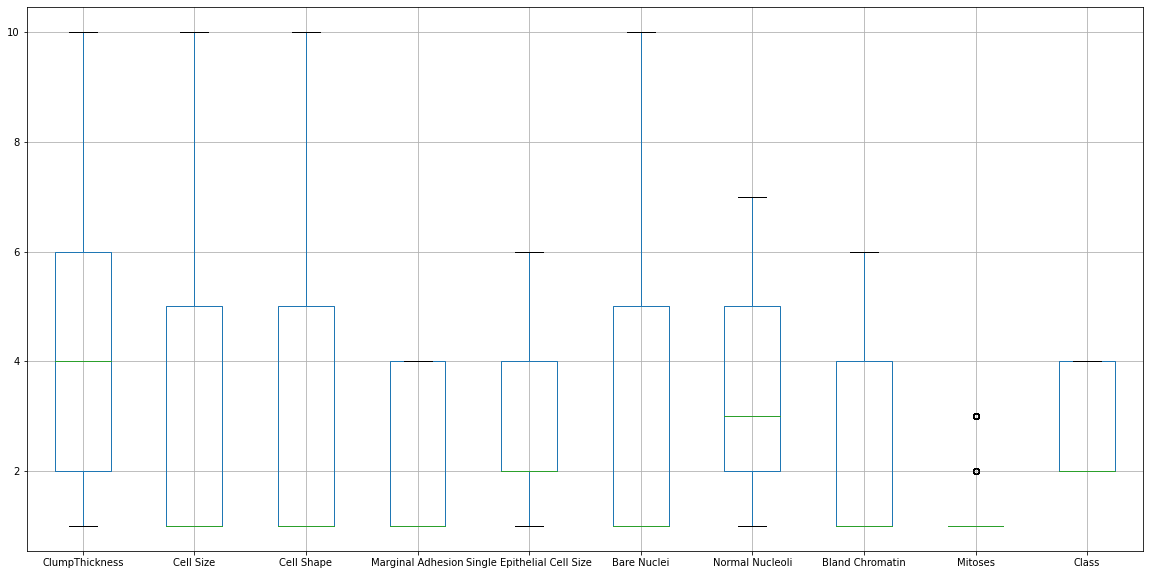

In [40]:
data.boxplot(figsize = (20,10))

In [41]:
from scipy.stats import zscore 


data_zscore = data.drop(['Class'], axis = 1)
data_zscore = data_zscore.apply(zscore)

data_zscore.head()


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.781803,-0.606754,-0.686858,-0.131401,-0.673794,-0.438024
1,0.202823,0.285065,0.268920,1.530101,1.934431,1.803153,-0.131401,-0.181817,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.781803,-0.606754,-0.410190,-0.131401,-0.673794,-0.438024
3,0.558020,1.600748,1.620866,-0.781803,0.028542,0.143146,-0.131401,1.786088,-0.438024
4,-0.152375,-0.701698,-0.745040,0.759466,-0.606754,-0.686858,-0.131401,-0.673794,-0.438024


# Q6 Create a covariance matrix for identifying Principal components

In [42]:
# PCA
# Step 1 - Create covariance matrix


In [43]:
data_zscore_matrix = np.cov(data_zscore.T)
print(data_zscore_matrix)

[[1.00145138 0.64410677 0.65453792 0.55329897 0.56014292 0.59150555
  0.57632311 0.5573719  0.42745595]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.78736392 0.68556472
  0.74749076 0.73254055 0.51098944]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.75864187 0.70518656
  0.73047144 0.72736411 0.48167882]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.6675427  0.69693138
  0.68237584 0.64893231 0.42473633]
 [0.56014292 0.78736392 0.75864187 0.6675427  1.00145138 0.64591131
  0.67167598 0.70333283 0.49711992]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.64591131 1.00145138
  0.69379705 0.62721796 0.45258904]
 [0.57632311 0.74749076 0.73047144 0.68237584 0.67167598 0.69379705
  1.00145138 0.68956763 0.41318259]
 [0.5573719  0.73254055 0.72736411 0.64893231 0.70333283 0.62721796
  0.68956763 1.00145138 0.4868789 ]
 [0.42745595 0.51098944 0.48167882 0.42473633 0.49711992 0.45258904
  0.41318259 0.4868789  1.00145138]]


# Q7 Identify eigen values and eigen vector

In [44]:
# Step 2- Get eigen values and eigen vector

In [45]:
ei_values, ei_vectors = np.linalg.eig(data_zscore_matrix)
print("Eigen Values:", ei_values)
print("Eigen Vicotrs: ", ei_vectors)

print("Eigen Values shape: ", ei_values.shape)
print("Eigen Vicotrs shape: ", ei_vectors.shape)

Eigen Values: [6.12239023 0.68550132 0.09010216 0.50420749 0.4297161  0.25418003
 0.33550572 0.30648192 0.28497745]
Eigen Vicotrs:  [[-3.02199806e-01 -1.79774768e-02  1.42451851e-02 -9.05446323e-01
   1.54182868e-01 -1.63546675e-01  6.53296095e-02  1.82879526e-01
  -9.13056785e-03]
 [-3.71169888e-01  6.48557497e-02  7.34223035e-01  7.40113350e-02
   2.98046020e-01  2.92846392e-01 -2.63092715e-01 -1.83665096e-01
   1.89537382e-01]
 [-3.67686019e-01  1.03227623e-01 -6.64295797e-01  1.04670334e-02
   2.80818693e-01  4.61194962e-01 -2.45453832e-01 -2.25481130e-01
   1.00515323e-01]
 [-3.34994926e-01  1.85863277e-01 -4.53107272e-02  1.39057987e-01
  -4.51982267e-01 -3.64109518e-02 -3.27294566e-01  6.38775792e-01
   3.33276286e-01]
 [-3.45695688e-01 -4.10338556e-03 -7.48887448e-02  2.62761983e-01
   3.02799368e-01 -6.68372741e-01 -3.23781727e-01 -2.23058080e-02
  -4.02596244e-01]
 [-3.34016499e-01  1.16311748e-01  8.24345421e-02 -8.95963505e-02
  -6.34142777e-01  1.86518381e-01  1.06992552e-

# Q8 Find variance and cumulative variance by each eigen vector

In [46]:
total = sum(ei_values) 
var_exp = [(i/total)*100 for i in sorted(ei_values, reverse = True)]
cum_var_exp = np.cumsum(var_exp) 
print(cum_var_exp)

[ 67.92796889  75.53361151  81.12779768  85.89550124  89.61793996
  93.01835931  96.18018638  99.00031581 100.        ]


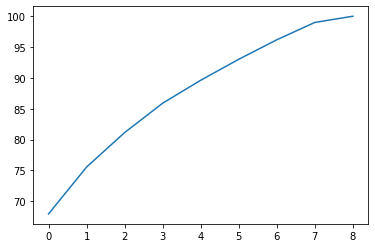

In [47]:
plt.plot(cum_var_exp)

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 7)

pca_data = pca.fit_transform(data_zscore)
pca_data

array([[-1.55553863e+00, -3.44474009e-02,  6.61474828e-01, ...,
         3.22002337e-01,  1.53595519e-01, -2.25983709e-01],
       [ 1.83475531e+00, -9.11634582e-01, -3.13555789e-01, ...,
        -1.41995365e+00, -2.75803547e-01,  1.28703958e+00],
       [-1.67780816e+00, -7.93982323e-02,  4.30389008e-02, ...,
         2.78552663e-01,  3.72365204e-01, -7.59872363e-02],
       ...,
       [ 4.09081102e+00,  9.48656375e-02, -1.32558668e+00, ...,
        -1.89294821e-03,  4.00120402e-01, -7.43501849e-01],
       [ 2.56550830e+00, -1.31396393e+00, -1.07376951e+00, ...,
         8.37640278e-01, -4.85724906e-01, -1.13992813e+00],
       [ 2.79296309e+00, -1.41404950e+00, -9.72456061e-01, ...,
        -1.69729279e-01,  2.07385298e-01, -1.07773547e+00]])

In [49]:
pca_data.shape

(690, 7)

# Q10 Find correlation between components and features

In [50]:
data_cor = pd.DataFrame(pca.components_, columns = list(data_zscore))

data_cor

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.302200,0.371170,0.367686,0.334995,0.345696,0.334016,0.341426,0.338555,0.247447
1,0.017977,-0.064856,-0.103228,-0.185863,0.004103,-0.116312,-0.225177,0.000746,0.941286
2,0.905446,-0.074011,-0.010467,-0.139058,-0.262762,0.089596,-0.097511,-0.254618,-0.061907
3,0.154183,0.298046,0.280819,-0.451982,0.302799,-0.634143,-0.145672,0.254944,-0.155589
4,0.065330,-0.263093,-0.245454,-0.327295,-0.323782,0.010699,0.482475,0.649129,0.006719
5,-0.182880,0.183665,0.225481,-0.638776,0.022306,0.321154,0.411856,-0.444805,0.053209
6,0.009131,-0.189537,-0.100515,-0.333276,0.402596,0.565598,-0.507924,0.286713,-0.143665


<AxesSubplot:>

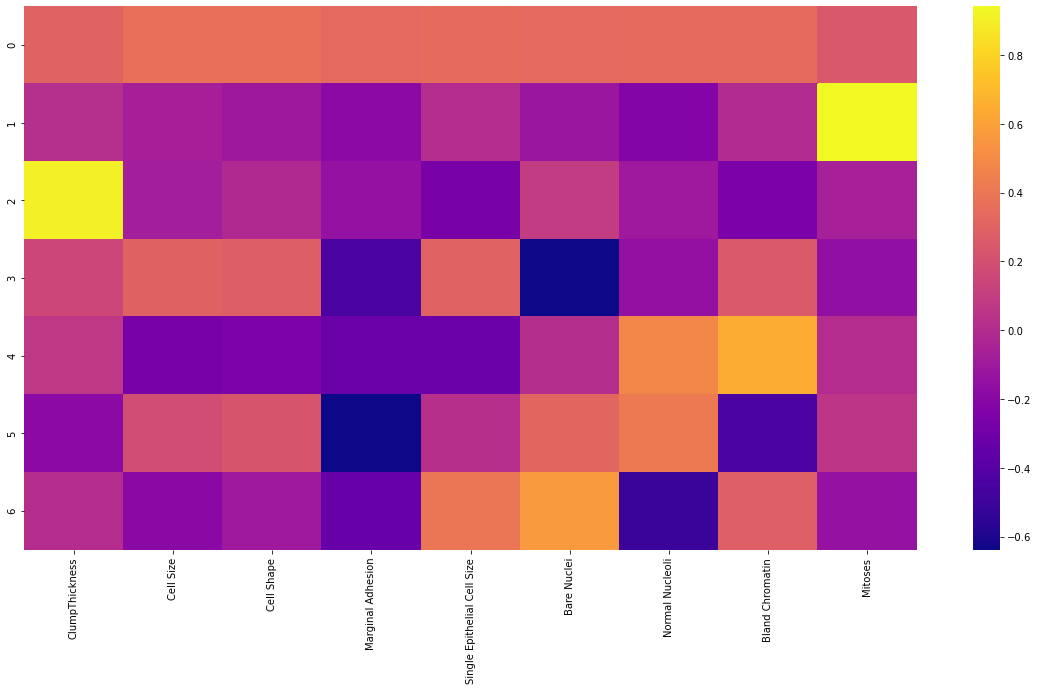

In [51]:
plt.figure(figsize = (20,10))
sns.heatmap(data_cor, cmap = 'plasma')

In [52]:
df_temp = pd.DataFrame(pca_data)

df_temp.head()

,0,1,2,3,4,5,6
0,-1.555539,-0.034447,0.661475,0.133628,0.322002,0.153596,-0.225984
1,1.834755,-0.911635,-0.313556,-1.016599,-1.419954,-0.275804,1.287040
2,-1.677808,-0.079398,0.043039,-0.151350,0.278553,0.372365,-0.075987
3,1.605970,-0.513714,0.069019,1.832178,0.558693,0.231545,0.533547
4,-1.146562,-0.327298,0.125537,-0.617764,-0.205652,-0.765972,-0.742895
